<a href="https://colab.research.google.com/github/tmukayev/Data-Science-projects/blob/main/assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load the data

In [ ]:
import os

In [ ]:
os.getcwd()

'/content'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set(color_codes=True)

import re

In [ ]:
house_df = pd.read_csv('/content/raw_house_data - raw_house_data.csv')

In [ ]:
house_df.head(10)

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10,10500,0,"Dishwasher, Freezer, Refrigerator, Oven",6.0,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2,7300,0,"Dishwasher, Garbage Disposal",5.0,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3,None,None,"Dishwasher, Garbage Disposal, Refrigerator",5.0,"Natural Stone, Other: Rock",None
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5,9019,4,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4.0,"Ceramic Tile, Laminate, Wood",None
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6,6396,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Carpet, Concrete",55
5,21528016,3250000.0,85718,-110.910593,32.339090,1.67,27802.84,1999,3,4,6842,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Natural Stone, Wood, Other",422
6,21610478,2400000.0,85712,-110.883315,32.261069,2.10,19038.42,2001,9,8,12025,4,"Dishwasher, Garbage Disposal, Oven",6.0,"Carpet, Natural Stone, Wood, Other",0
7,21211741,2500000.0,85750,-110.861002,32.331603,1.07,21646.00,2011,6,8,8921,4,"Compactor, Dishwasher, Freezer, Garbage Dispos...",5.0,"Carpet, Natural Stone, Wood",220
8,21324646,3700000.0,85718,-110.912156,32.343601,6.73,25094.39,2002,5,7,5238,3,"Compactor, Dishwasher, Freezer, Garbage Dispos...",1.0,"Carpet, Natural Stone, Wood, Other",421
9,21812010,3250000.0,85750,-110.837950,32.327575,3.53,18936.11,2007,5,6,6480,3,"Dishwasher, Double Sink, Electric Range, Freez...",2.0,"Carpet, Concrete",141.67


In [ ]:
house_df.columns.tolist()

['MLS',
 'sold_price',
 'zipcode',
 'longitude',
 'latitude',
 'lot_acres',
 'taxes',
 'year_built',
 'bedrooms',
 'bathrooms',
 'sqrt_ft',
 'garage',
 'kitchen_features',
 'fireplaces',
 'floor_covering',
 'HOA']

In [ ]:
house_df.info

<bound method DataFrame.info of            MLS  sold_price  zipcode   longitude   latitude  lot_acres  \
0     21530491   5300000.0    85637 -110.378200  31.356362    2154.00   
1     21529082   4200000.0    85646 -111.045371  31.594213    1707.00   
2      3054672   4200000.0    85646 -111.040707  31.594844    1707.00   
3     21919321   4500000.0    85646 -111.035925  31.645878     636.67   
4     21306357   3411450.0    85750 -110.813768  32.285162       3.21   
...        ...         ...      ...         ...        ...        ...   
4995  21810382    495000.0    85641 -110.661829  31.907917       4.98   
4996  21908591    550000.0    85750 -110.858556  32.316373       1.42   
4997  21832452    475000.0    85192 -110.755428  32.964708      12.06   
4998  21900515    550000.0    85745 -111.055528  32.296871       1.01   
4999   4111490    450000.0    85621 -110.913054  31.385259       4.16   

         taxes  year_built  bedrooms bathrooms sqrt_ft garage  \
0      5272.00        1941

In [ ]:
house_df.shape

(5000, 16)

In [ ]:
house_df.describe()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,fireplaces
count,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5000.000000,4990.000000,5.000000e+03,5000.00000,5000.000000,4975.000000
mean,2.127070e+07,7.746262e+05,85723.025600,-110.912107,32.308512,4.661317,9.402828e+03,1992.32800,3.933800,1.885226
std,2.398508e+06,3.185556e+05,38.061712,0.120629,0.178028,51.685230,1.729385e+05,65.48614,1.245362,1.136578
min,3.042851e+06,1.690000e+05,85118.000000,-112.520168,31.356362,0.000000,0.000000e+00,0.00000,1.000000,0.000000
25%,2.140718e+07,5.850000e+05,85718.000000,-110.979260,32.277484,0.580000,4.803605e+03,1987.00000,3.000000,1.000000
50%,2.161469e+07,6.750000e+05,85737.000000,-110.923420,32.318517,0.990000,6.223760e+03,1999.00000,4.000000,2.000000
75%,2.180480e+07,8.350000e+05,85749.000000,-110.859078,32.394334,1.757500,8.082830e+03,2006.00000,4.000000,3.000000
max,2.192856e+07,5.300000e+06,86323.000000,-109.454637,34.927884,2154.000000,1.221508e+07,2019.00000,36.000000,9.000000


## Identify the data types

In [ ]:
house_df.dtypes

MLS                   int64
sold_price          float64
zipcode               int64
longitude           float64
latitude            float64
lot_acres           float64
taxes               float64
year_built            int64
bedrooms              int64
bathrooms            object
sqrt_ft              object
garage               object
kitchen_features     object
fireplaces          float64
floor_covering       object
HOA                  object
dtype: object

In [ ]:
house_df.fillna(0)

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10,10500,0,"Dishwasher, Freezer, Refrigerator, Oven",6.0,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2,7300,0,"Dishwasher, Garbage Disposal",5.0,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3,None,None,"Dishwasher, Garbage Disposal, Refrigerator",5.0,"Natural Stone, Other: Rock",None
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5,9019,4,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4.0,"Ceramic Tile, Laminate, Wood",None
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6,6396,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Carpet, Concrete",55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,21810382,495000.0,85641,-110.661829,31.907917,4.98,2017.00,2005,5,3,3601,3,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1.0,"Carpet, Ceramic Tile",None
4996,21908591,550000.0,85750,-110.858556,32.316373,1.42,4822.01,1990,4,3,2318,3,"Dishwasher, Double Sink, Electric Range, Garba...",1.0,"Carpet, Ceramic Tile",43
4997,21832452,475000.0,85192,-110.755428,32.964708,12.06,1000.00,1969,3,2,1772,0,"Dishwasher, Electric Range, Island, Refrigerat...",0.0,Ceramic Tile,None
4998,21900515,550000.0,85745,-111.055528,32.296871,1.01,5822.93,2009,4,4,3724,3,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1.0,"Carpet, Ceramic Tile",None


In [ ]:
# replace 'None' values with 0
house_df['bathrooms'] = house_df['bathrooms'].replace('None', 0)
house_df['sqrt_ft'] = house_df['sqrt_ft'].replace('None', 0)
house_df['garage'] = house_df['garage'].replace('None', 0)
house_df['HOA'] = house_df['HOA'].replace('None', 0)

# convert column 'A' to float
house_df['bathrooms'] = house_df['bathrooms'].astype(float)
house_df['sqrt_ft'] = house_df['sqrt_ft'].astype(float)
house_df['garage'] = house_df['garage'].astype(float)
house_df['HOA'] = house_df['HOA'].str.replace(',', '').astype(float)


In [ ]:
# split the kitchen features column into a list of words
all_kitchen_features = []
for features in house_df['kitchen_features']:
    all_kitchen_features.extend(features.split(', '))

# count the occurrence of each word
word_count = {}
for word in all_kitchen_features:
    if word not in word_count:
        word_count[word] = 1
    else:
        word_count[word] += 1

# create a dataframe with the counts
df_word_count = pd.DataFrame.from_dict(word_count, orient='index', columns=['count'])

# sort the dataframe by count in descending order
df_word_count.sort_values('count', ascending=False, inplace=True)

# print the top 10 most frequent words
df_word_count[:25]

,count
Dishwasher,4857
Garbage Disposal,4520
Refrigerator,4232
Oven,2885
Microwave,2592
Gas Range,1307
Appliance Color: Stainless,1298
Island,1253
Double Sink,1164
Countertops: Granite,801


In [ ]:
# define the categories based on context
categories = {
    'cooking': ['oven', 'electric range','gas range', 'cooktop', 'microwave', 'grill', 'toaster', 'blender', 
                'mixer', 'food processor', 'appliance color: stainless', 'microwave: stainless'],
    'storage': ['refrigerator', 'freezer', 'pantry', 'cabinet', 'drawer', 'shelving', 'warming drawer',
                'pantry: walkin-in', 'pantry: closet', 'pantry: cabinet'],
    'cleaning': ['dishwasher', 'garbage disposal', 'trash compactor', 'compactor', 'prep sink'],
    'countertop': ['countertops: granite', 'sink', 'double sink', 'wet bar', 'bar', 'desk', 'lazy susan', 'island'],
    'water': ['faucet', 'water filtration', 'ice maker', 'dispenser', 'osmosis', 'reverse osmosis', 'water purifier']
    }
# Lowercase and remove whitespace from the strings in kitchen_features
house_df['kitchen_features'] = house_df['kitchen_features'].str.lower().str.replace(' ', '')

# Regroup kitchen_features based on categories
for category in categories:
    house_df[category] = house_df['kitchen_features'].apply(lambda x: any(item in x for item in categories[category]))

# Print the resulting dataframe
house_df.head(10)

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,...,garage,kitchen_features,fireplaces,floor_covering,HOA,cooking,storage,cleaning,countertop,water
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,...,0.0,"dishwasher,freezer,refrigerator,oven",6.0,"Mexican Tile, Wood",0.00,True,True,True,False,False
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,...,0.0,"dishwasher,garbagedisposal",5.0,"Natural Stone, Other",0.00,False,False,True,False,False
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,...,0.0,"dishwasher,garbagedisposal,refrigerator",5.0,"Natural Stone, Other: Rock",NaN,False,True,True,False,False
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,...,4.0,"dishwasher,doublesink,pantry:butler,refrigerator",4.0,"Ceramic Tile, Laminate, Wood",NaN,False,True,True,True,False
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,...,3.0,"dishwasher,garbagedisposal,refrigerator,microw...",5.0,"Carpet, Concrete",55.00,True,True,True,False,False
5,21528016,3250000.0,85718,-110.910593,32.339090,1.67,27802.84,1999,3,4.0,...,3.0,"dishwasher,garbagedisposal,refrigerator,microw...",5.0,"Natural Stone, Wood, Other",422.00,True,True,True,False,False
6,21610478,2400000.0,85712,-110.883315,32.261069,2.10,19038.42,2001,9,8.0,...,4.0,"dishwasher,garbagedisposal,oven",6.0,"Carpet, Natural Stone, Wood, Other",0.00,True,False,True,False,False
7,21211741,2500000.0,85750,-110.861002,32.331603,1.07,21646.00,2011,6,8.0,...,4.0,"compactor,dishwasher,freezer,garbagedisposal,r...",5.0,"Carpet, Natural Stone, Wood",220.00,True,True,True,False,False
8,21324646,3700000.0,85718,-110.912156,32.343601,6.73,25094.39,2002,5,7.0,...,3.0,"compactor,dishwasher,freezer,garbagedisposal,r...",1.0,"Carpet, Natural Stone, Wood, Other",421.00,True,True,True,False,False
9,21812010,3250000.0,85750,-110.837950,32.327575,3.53,18936.11,2007,5,6.0,...,3.0,"dishwasher,doublesink,electricrange,freezer,ga...",2.0,"Carpet, Concrete",141.67,True,True,True,True,False


In [ ]:
# split the floor_covering column into a list of words
all_floor_coverings = []
for coverings in house_df['floor_covering']:
    all_floor_coverings.extend(coverings.split(', '))

# count the occurrence of each word
word_count = {}
for word in all_floor_coverings:
    if word not in word_count:
        word_count[word] = 1
    else:
        word_count[word] += 1

# create a dataframe with the counts
df_word_count = pd.DataFrame.from_dict(word_count, orient='index', columns=['count'])

# sort the dataframe by count in descending order
df_word_count.sort_values('count', ascending=False, inplace=True)

# print the top 10 most frequent words
df_word_count[:25]


,count
Carpet,3507
Ceramic Tile,2527
Natural Stone,1499
Wood,1233
Concrete,751
Mexican Tile,660
Other,269
Laminate,79
Vinyl,56
Other: Travertine,26


In [ ]:
#clean the row floor_covering
house_df['floor_covering'] = house_df['floor_covering'].str.replace('Other: ', '')

In [ ]:
# define the floor categories based on context
floor_categories = {
    'tile': ['mexican tile', 'ceramic tile', 'porcelain tile', 'travertine tile', 'tile-other', 'italian tile', 'saltillo', 'slate'],
    'carpet': ['carpet'],
    'stone': ['natural stone', 'marble', 'flagstone', 'brick', 'rock', 'limestone'],
    'other': ['wood', 'cork', 'concrete', 'parquete', 'harwood', 'bamboo', 'acrulic overlay', 'vinyl']

    }
# Lowercase and remove whitespace from the strings in floor_covering
house_df['floor_covering'] = house_df['floor_covering'].str.lower().str.replace(' ', '')

# Regroup floor_covering based on categories
for floor_category in floor_categories:
    house_df[floor_category] = house_df['floor_covering'].apply(lambda x: any(item in x for item in floor_categories[floor_category]))

# Print the resulting dataframe
# house_df.head(10)
new_house_df = house_df
new_house_df.head(10)

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,...,HOA,cooking,storage,cleaning,countertop,water,tile,carpet,stone,other
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,...,0.00,True,True,True,False,False,False,False,False,True
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,...,0.00,False,False,True,False,False,False,False,False,False
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,...,NaN,False,True,True,False,False,False,False,True,False
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,...,NaN,False,True,True,True,False,False,False,False,True
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,...,55.00,True,True,True,False,False,False,True,False,True
5,21528016,3250000.0,85718,-110.910593,32.339090,1.67,27802.84,1999,3,4.0,...,422.00,True,True,True,False,False,False,False,False,True
6,21610478,2400000.0,85712,-110.883315,32.261069,2.10,19038.42,2001,9,8.0,...,0.00,True,False,True,False,False,False,True,False,True
7,21211741,2500000.0,85750,-110.861002,32.331603,1.07,21646.00,2011,6,8.0,...,220.00,True,True,True,False,False,False,True,False,True
8,21324646,3700000.0,85718,-110.912156,32.343601,6.73,25094.39,2002,5,7.0,...,421.00,True,True,True,False,False,False,True,False,True
9,21812010,3250000.0,85750,-110.837950,32.327575,3.53,18936.11,2007,5,6.0,...,141.67,True,True,True,True,False,False,True,False,True


In [ ]:
# house_df_copy = house_df.copy()
# house_df_copy
new_house_df.columns.tolist()

['MLS',
 'sold_price',
 'zipcode',
 'longitude',
 'latitude',
 'lot_acres',
 'taxes',
 'year_built',
 'bedrooms',
 'bathrooms',
 'sqrt_ft',
 'garage',
 'kitchen_features',
 'fireplaces',
 'floor_covering',
 'HOA',
 'cooking',
 'storage',
 'cleaning',
 'countertop',
 'water',
 'tile',
 'carpet',
 'stone',
 'other']

In [ ]:
# house_df_copy.head(10)

In [ ]:
new_house_df.describe()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA
count,5000.00,5000.00,5000.00,5000.00,5000.00,4990.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,4975.00,4438.00
mean,21270699.22,774626.20,85723.03,-110.91,32.31,4.66,9402.83,1992.33,3.93,3.83,3674.74,2.81,1.89,103.04
std,2398507.68,318555.61,38.06,0.12,0.18,51.69,172938.53,65.49,1.25,1.39,1181.04,1.20,1.14,547.40
min,3042851.00,169000.00,85118.00,-112.52,31.36,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,21407176.50,585000.00,85718.00,-110.98,32.28,0.58,4803.61,1987.00,3.00,3.00,3032.00,2.00,1.00,8.00
50%,21614686.50,675000.00,85737.00,-110.92,32.32,0.99,6223.76,1999.00,4.00,4.00,3499.50,3.00,2.00,56.00
75%,21804801.75,835000.00,85749.00,-110.86,32.39,1.76,8082.83,2006.00,4.00,4.00,4120.00,3.00,3.00,135.00
max,21928565.00,5300000.00,86323.00,-109.45,34.93,2154.00,12215075.00,2019.00,36.00,36.00,22408.00,30.00,9.00,20000.00


In [ ]:
#Drop duplicates
new_house_df = new_house_df.drop_duplicates()
new_house_df.shape

(5000, 25)

In [ ]:
new_house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLS               5000 non-null   int64  
 1   sold_price        5000 non-null   float64
 2   zipcode           5000 non-null   int64  
 3   longitude         5000 non-null   float64
 4   latitude          5000 non-null   float64
 5   lot_acres         4990 non-null   float64
 6   taxes             5000 non-null   float64
 7   year_built        5000 non-null   int64  
 8   bedrooms          5000 non-null   int64  
 9   bathrooms         5000 non-null   float64
 10  sqrt_ft           5000 non-null   float64
 11  garage            5000 non-null   float64
 12  kitchen_features  5000 non-null   object 
 13  fireplaces        4975 non-null   float64
 14  floor_covering    5000 non-null   object 
 15  HOA               4438 non-null   float64
 16  cooking           5000 non-null   bool   


In [ ]:
new_house_df.isna().sum()

MLS                   0
sold_price            0
zipcode               0
longitude             0
latitude              0
lot_acres            10
taxes                 0
year_built            0
bedrooms              0
bathrooms             0
sqrt_ft               0
garage                0
kitchen_features      0
fireplaces           25
floor_covering        0
HOA                 562
cooking               0
storage               0
cleaning              0
countertop            0
water                 0
tile                  0
carpet                0
stone                 0
other                 0
dtype: int64

In [ ]:
#Missing data percentage
# round(house_df.isna().sum() / len(house_df), 4) * 100
#clean the HOA, fireplace and lot_acres:
new_house_df.fillna({'HOA': 0, 'lot_acres': 0, 'fireplaces': 0}, inplace=True)

In [ ]:
#check NaN values again
new_house_df.isna().sum()

MLS                 0
sold_price          0
zipcode             0
longitude           0
latitude            0
lot_acres           0
taxes               0
year_built          0
bedrooms            0
bathrooms           0
sqrt_ft             0
garage              0
kitchen_features    0
fireplaces          0
floor_covering      0
HOA                 0
cooking             0
storage             0
cleaning            0
countertop          0
water               0
tile                0
carpet              0
stone               0
other               0
dtype: int64

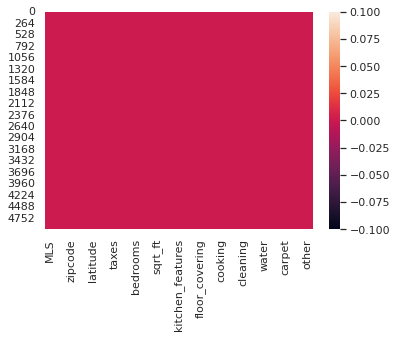

In [ ]:
#Generate a heatmap of the output of isnull() in order to detect missing values.
# sns.heatmap(house_df.isnull())
# plt.show()

EDA:


*   Summary Statistics
*   Data Visualization

In [ ]:
#Statistics: mean, median, mode, standard deviation ==> sold_price, lot_acres, taxes, bedrooms, bathrooms, sqrt_ft, fireplaces, and HOA
pd.options.display.float_format = '{:.2f}'.format
new_house_df['sold_price'].describe()


count      5000.00
mean     774626.20
std      318555.61
min      169000.00
25%      585000.00
50%      675000.00
75%      835000.00
max     5300000.00
Name: sold_price, dtype: float64

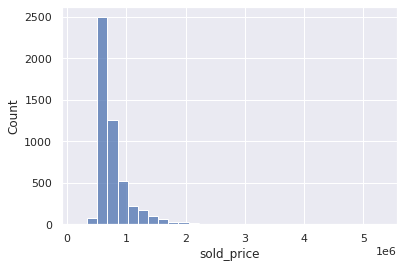

In [ ]:
# Create histogram of sold_price
sns.histplot(data=new_house_df, x='sold_price', bins=30)
plt.show()

<AxesSubplot:xlabel='bedrooms', ylabel='sold_price'>

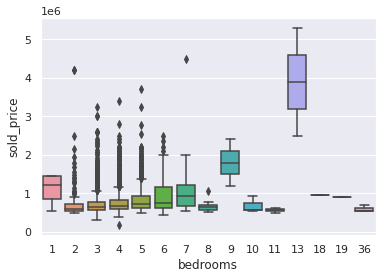

In [ ]:
sns.boxplot(x='bedrooms', y='sold_price', data=new_house_df)


In [ ]:
# sns.pairplot(house_df)

<AxesSubplot:>

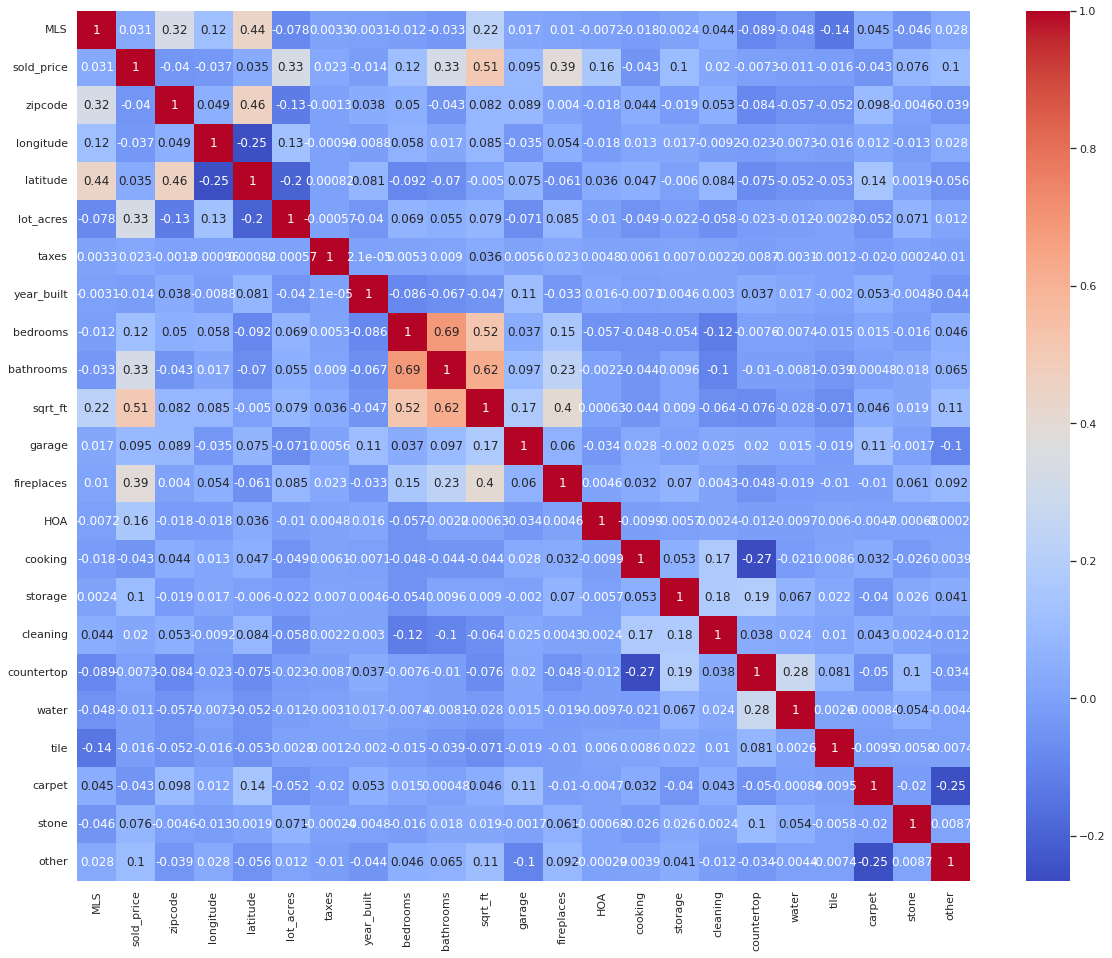

In [ ]:
plt.figure(figsize=(20, 16))

sns.heatmap(new_house_df.corr(), annot=True, cmap='coolwarm')

In [ ]:
new_house_df.dtypes

MLS                   int64
sold_price          float64
zipcode               int64
longitude           float64
latitude            float64
lot_acres           float64
taxes               float64
year_built            int64
bedrooms              int64
bathrooms           float64
sqrt_ft             float64
garage              float64
kitchen_features     object
fireplaces          float64
floor_covering       object
HOA                 float64
cooking                bool
storage                bool
cleaning               bool
countertop             bool
water                  bool
tile                   bool
carpet                 bool
stone                  bool
other                  bool
dtype: object

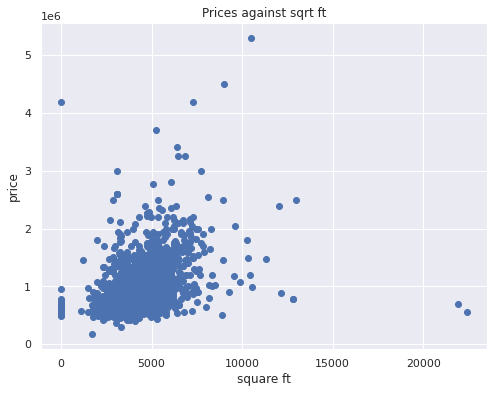

In [ ]:
x = new_house_df['sqrt_ft']
y = new_house_df['sold_price']
plt.figure(figsize=(8,6))
plt.scatter(x, y)
plt.xlabel('square ft')
plt.ylabel('price')
plt.title('Prices against sqrt ft')
# plt.yticks([0, 50, 100, 150, 200, 300, 400, 500, 600], ['0', '50K', '100K', '150K', '200K'])
plt.show()


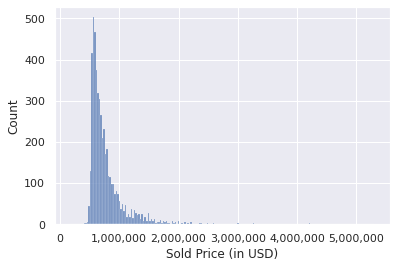

In [ ]:
# create histogram using matplotlib
import matplotlib.ticker as mtick

sns.histplot(data=new_house_df, x='sold_price', bins=200)

# create a formatter to add commas to the x-axis tick labels
formatter = mtick.FuncFormatter(lambda x, p: f'{int(x):,}')

# set the formatter for the x-axis ticks
plt.gca().xaxis.set_major_formatter(formatter)

# set the x-axis label
plt.xlabel('Sold Price (in USD)')


# show the plot
plt.show()

<AxesSubplot:>

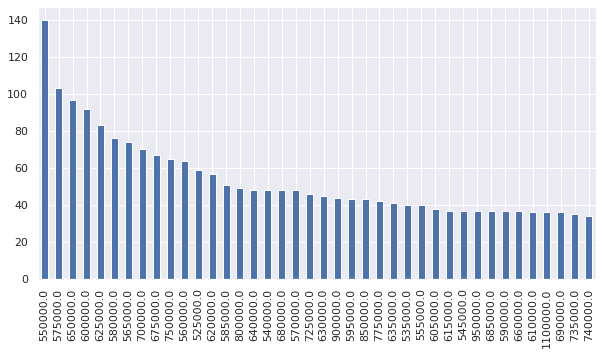

In [ ]:
new_house_df.sold_price.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))

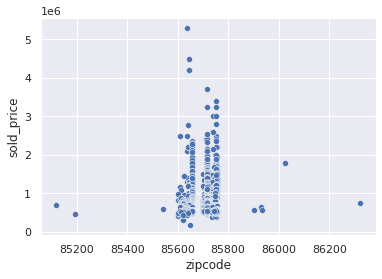

In [ ]:
#find the relation betweeb price and zipcode
# plot a scatter plot of sold prices vs zipcodes
sns.scatterplot(data=new_house_df, x='zipcode', y='sold_price')
plt.show()

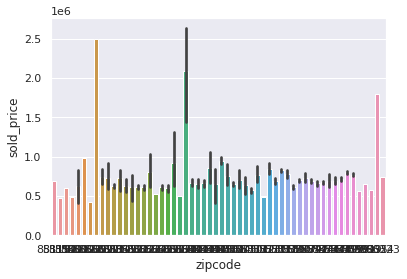

In [ ]:
# plot a bar chart of median sold prices by zipcode
sns.barplot(data=new_house_df, x='zipcode', y='sold_price')
plt.show()

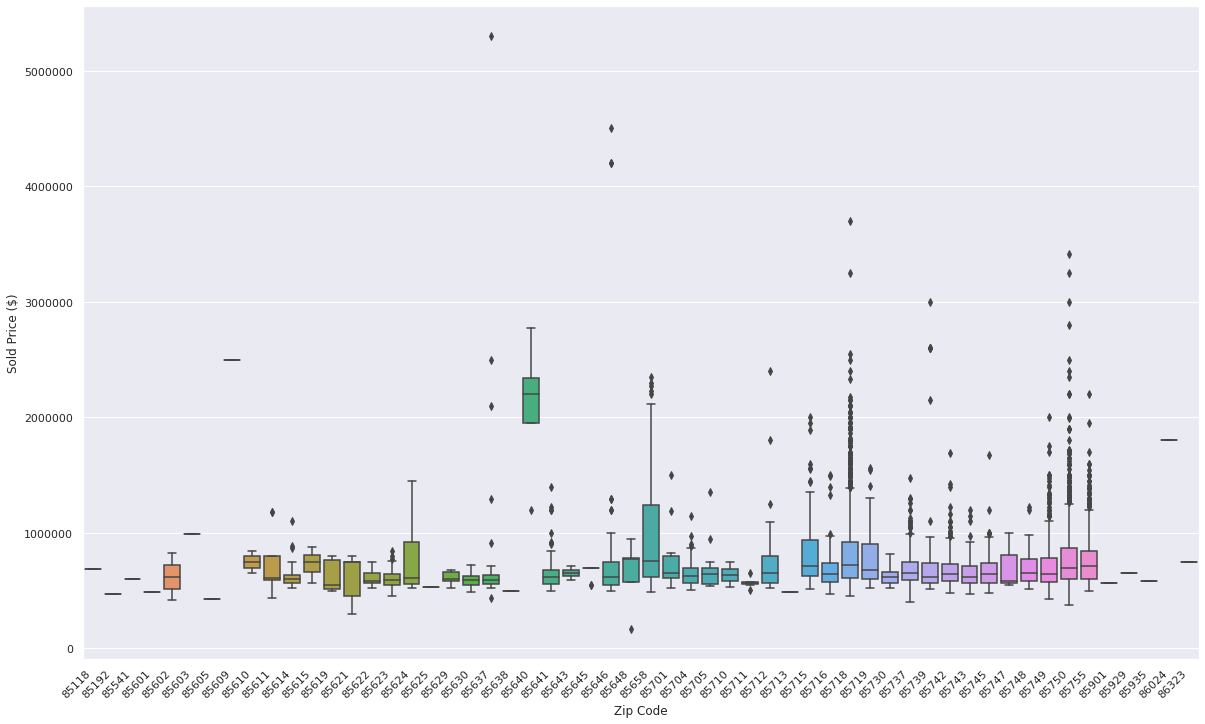

In [ ]:
#Let's the Zip code distribution vs price

fig, ax = plt.subplots(figsize=(20, 12))
sns.boxplot(data=new_house_df, x='zipcode', y='sold_price', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.ticklabel_format(style='plain', axis='y')
ax.set_xlabel('Zip Code', fontsize=12)
ax.set_ylabel('Sold Price ($)', fontsize=12)
plt.show()


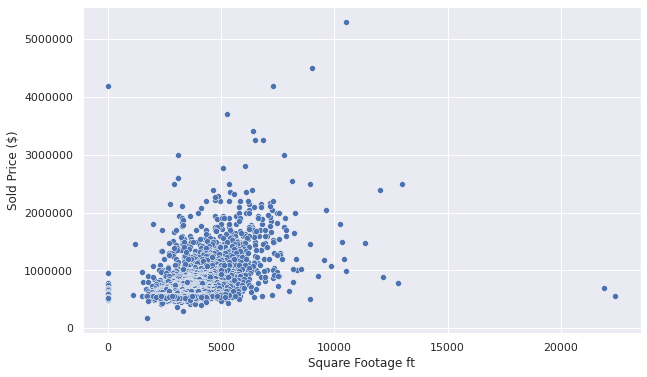

In [ ]:
#Let's sqrt ft distribution vs price
fig, ax = plt.subplots(figsize=(10, 6))

# plot a scatter plot of sold prices against square ft
sns.scatterplot(data=new_house_df, x='sqrt_ft', y='sold_price', ax=ax)
ax.ticklabel_format(style='plain', axis='y')

#ax.yaxis.set_major_formatter(formatter)

# set the x-axis and y-axis labels
ax.set_xlabel('Square Footage ft', fontsize=12)
ax.set_ylabel('Sold Price ($)', fontsize=12)
plt.show()


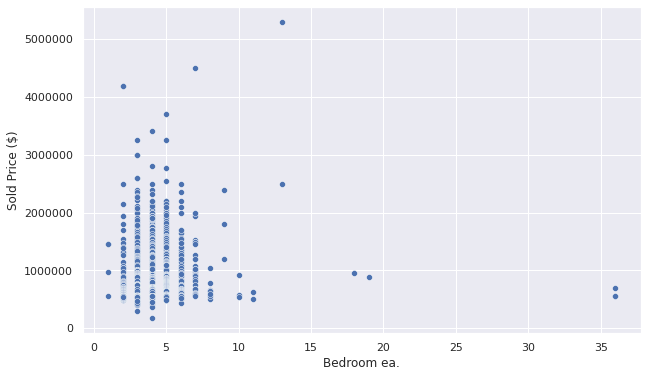

In [ ]:
# bedrooms
        
#Let's bedrooms ft distribution vs price
fig, ax = plt.subplots(figsize=(10, 6))

# plot a scatter plot of sold prices against square ft
sns.scatterplot(data=new_house_df, x='bedrooms', y='sold_price', ax=ax)
ax.ticklabel_format(style='plain', axis='y')

#ax.yaxis.set_major_formatter(formatter)

# set the x-axis and y-axis labels
ax.set_xlabel('Bedroom ea.', fontsize=12)
ax.set_ylabel('Sold Price ($)', fontsize=12)
plt.show()


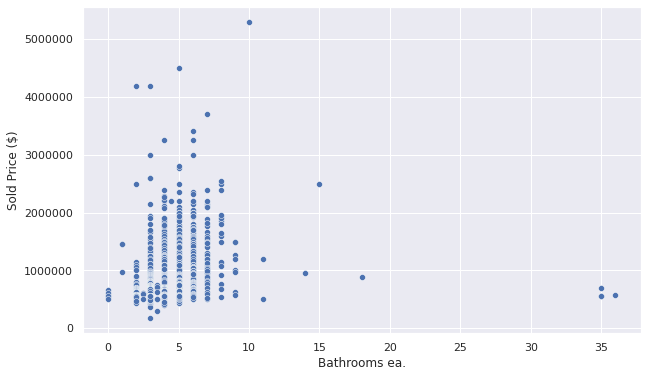

In [ ]:
#Let's bathrooms ft distribution vs price
fig, ax = plt.subplots(figsize=(10, 6))

# plot a scatter plot of sold prices against bathrooms
sns.scatterplot(data=new_house_df, x='bathrooms', y='sold_price', ax=ax)
ax.ticklabel_format(style='plain', axis='y')


# set the x-axis and y-axis labels
ax.set_xlabel('Bathrooms ea.', fontsize=12)
ax.set_ylabel('Sold Price ($)', fontsize=12)
plt.show()


In [ ]:
new_house_df.bathrooms.describe()

count   5000.00
mean       3.83
std        1.39
min        0.00
25%        3.00
50%        4.00
75%        4.00
max       36.00
Name: bathrooms, dtype: float64